In [12]:
from datetime import date, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import warnings
# warnings.filterwarnings('ignore')


In [13]:
sdate = date(2017,11,1)   # start date
edate = date(2022,4,30)   # end date

In [14]:
df_f = pd.date_range(sdate,edate-timedelta(days=1),freq='d').to_frame(index=False, name='Fecha')
df_f['target'] = 0
print(df_f.shape)
df_f.head()

(1641, 2)


,Fecha,target
0,2017-11-01,0
1,2017-11-02,0
2,2017-11-03,0
3,2017-11-04,0
4,2017-11-05,0


In [15]:
df_n = pd.read_csv('Nominas.csv', sep=';')
print(df_n.shape)
df_n.head()

(54, 1)


,Fecha
0,26/04/2022
1,26/03/2022
2,24/02/2022
3,27/01/2022
4,25/12/2021


In [16]:
df_n['Fecha'] = df_n['Fecha'].astype('datetime64')
df_n['target'] = 1
df_n.head()

C:\Users\JuanRamón\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '26/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\JuanRamón\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '26/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\JuanRamón\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '24/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\JuanRamón\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '27/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

,Fecha,target
0,2022-04-26,1
1,2022-03-26,1
2,2022-02-24,1
3,2022-01-27,1
4,2021-12-25,1


In [17]:
df_f = df_f[~df_f['Fecha'].isin(df_n['Fecha'])]
print(df_f.shape)
df_f.head()

(1587, 2)


,Fecha,target
0,2017-11-01,0
1,2017-11-02,0
2,2017-11-03,0
3,2017-11-04,0
4,2017-11-05,0


In [18]:
df = pd.concat([df_f, df_n])
print(df.shape)
df.head()

(1641, 2)


,Fecha,target
0,2017-11-01,0
1,2017-11-02,0
2,2017-11-03,0
3,2017-11-04,0
4,2017-11-05,0


In [19]:
# Preparación del dato
# ==============================================================================
df = df.set_index('Fecha')
df = df.asfreq('D')
df = df.sort_index()
df.head()

,target
Fecha,
2017-11-01,0
2017-11-02,0
2017-11-03,0
2017-11-04,0
2017-11-05,0


In [20]:
print(f'Número de filas con missing values: {df.isnull().any(axis=1).mean()}')

Número de filas con missing values: 0.0


Fechas train : 2017-11-01 00:00:00 --- 2020-05-29 00:00:00  (n=941)
Fechas test  : 2020-05-30 00:00:00 --- 2022-04-29 00:00:00  (n=700)


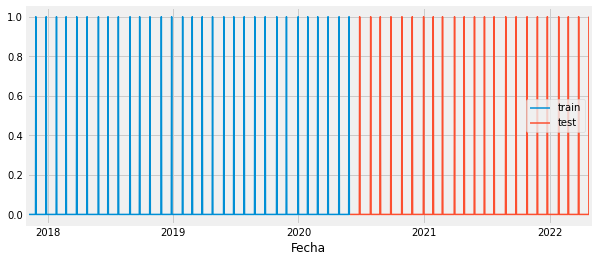

In [21]:
# Separación datos train-test
# ==============================================================================
steps = 700
df_train = df[:-steps]
df_test  = df[-steps:]

print(f"Fechas train : {df_train.index.min()} --- {df_train.index.max()}  (n={len(df_train)})")
print(f"Fechas test  : {df_test.index.min()} --- {df_test.index.max()}  (n={len(df_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
df_train['target'].plot(ax=ax, label='train')
df_test['target'].plot(ax=ax, label='test')
ax.legend();

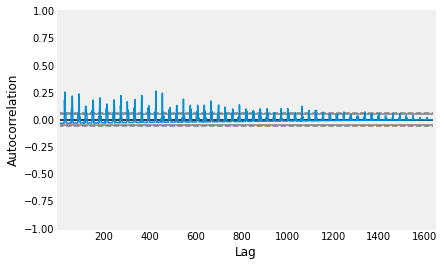

In [23]:
autocorrelation_plot(df['target'])
pyplot.show()

In [25]:
ARIMAmodel = ARIMA(df_train, order = (50, 30, 5))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(df_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(df_train, color = "black")
plt.plot(df_test, color = "red")
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(df_test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\JuanRamón\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JuanRamón\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
